# Task 2
Perform data cleaning and data exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic datasets from kaggle. Explore the relationship between variables and identify patterns and trends in the data

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [27]:
data = pd.read_csv(r"C:\Users\pattn\Downloads\PRODIGY_DS\PRODIGY_DS_02-main\PRODIGY_DS_02-main\Titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA):

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above description we get that:

1. There are total 891 passenger record in our dataset.

2. Average age of passenger is around 30. 

3. Average Fare price is around 32.20 (in dollars) and maximum fare price is around 512.32 (in dollars).

In [30]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# filling age column with mean value of age column
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [32]:
# filling Embark column with mode value of the column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [33]:
# dropping not necessary column
data.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
data.duplicated().sum()

111

In [36]:
data.nunique() 
#checking unique values.

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [37]:
#checking stastical correlation between numeric columns
data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


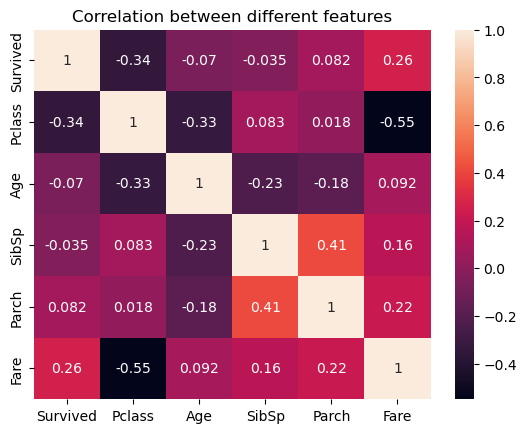

In [38]:
# plotting correlation matrix by using heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation between different features')
plt.show()

# Data Visualization

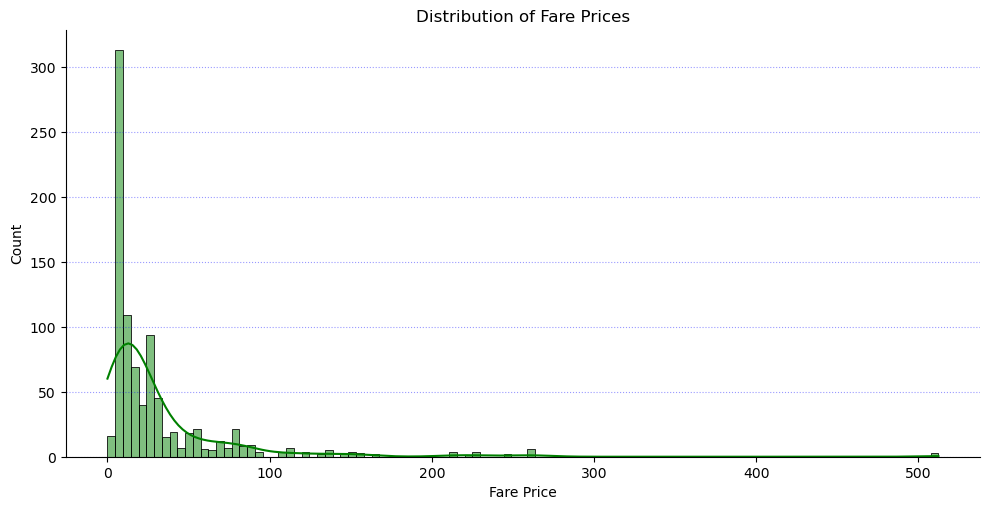

In [39]:
sns.displot(data, x = 'Fare', kde=True, aspect=2, color = 'Green')
plt.title("Distribution of Fare Prices")
plt.xlabel('Fare Price')
plt.ylabel('Count')
plt.grid(axis='y', ls=':', alpha=0.4, color='b')
plt.show()


## Observation:
From above dstribustion we can say most of the ticket are sold in price range of 1-50 dollars and from this we can determine that fare column is having high skewness

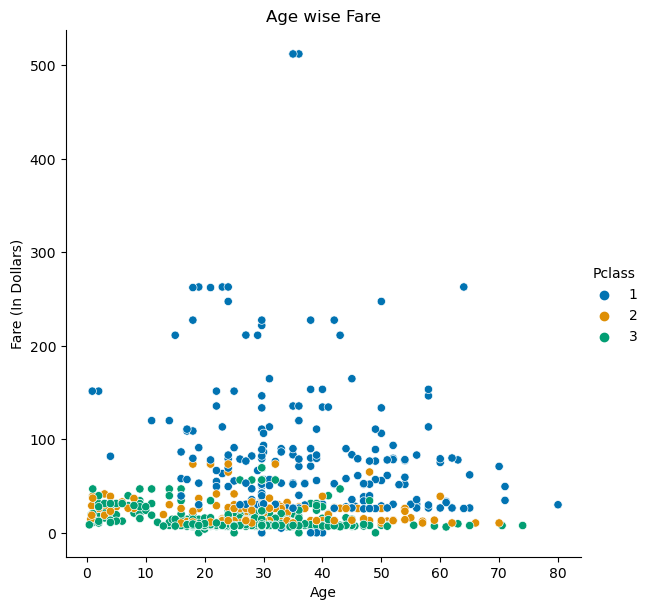

In [40]:
# ploting scatter point
sns.relplot(data, y='Fare', x='Age', kind='scatter', hue='Pclass', palette='colorblind', height=6)
plt.title('Age wise Fare')
plt.xlabel('Age')
plt.ylabel('Fare (In Dollars)')
plt.show()


# Observation :
1 Most tickets are sold from 3rd class

2 And 1st class tickets are costlier than class 2 and class

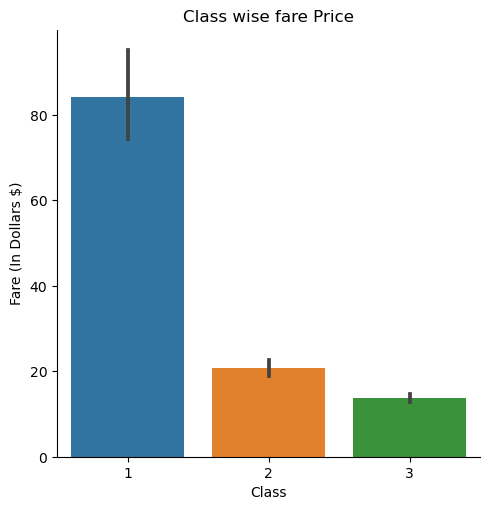

In [41]:
# Ploting bar plot
sns.catplot(data, x='Pclass', y='Fare', kind='bar')
plt.title('Class wise fare Price')
plt.xlabel('Class')
plt.ylabel('Fare (In Dollars $)')
plt.show()

# Observation :
1. 1st class having highest fare price.
2. 3rd class having lowest fare price

In [42]:
class_count = data['Pclass'].value_counts()

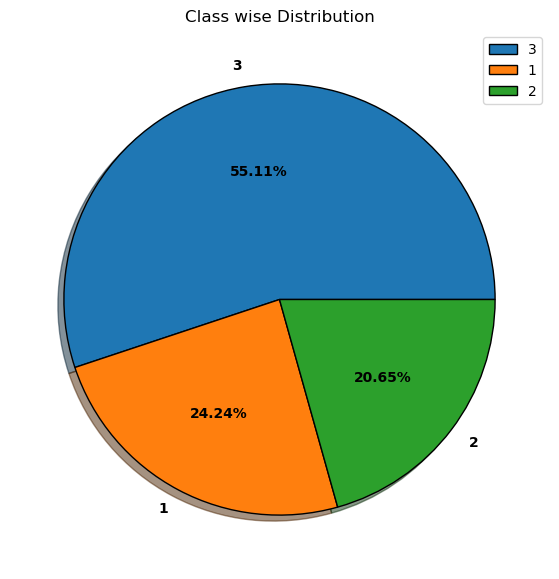

In [43]:
# setting figure size
plt.figure(figsize=(10,7))

# ploting pie chart for class counts
plt.pie(class_count, labels=class_count.index, autopct='%.2f%%', shadow=True, 
       wedgeprops={'linewidth':1, 'edgecolor':'black'},
       textprops={'weight':'bold'})
plt.legend()
plt.title('Class wise Distribution')
plt.show()

# Obseevation:
1. From above pie chart we can observed that 3rd class tickets sold highest and is about 55.11%

2. Lowest sale tickets are from 2nd class and about 20.65%

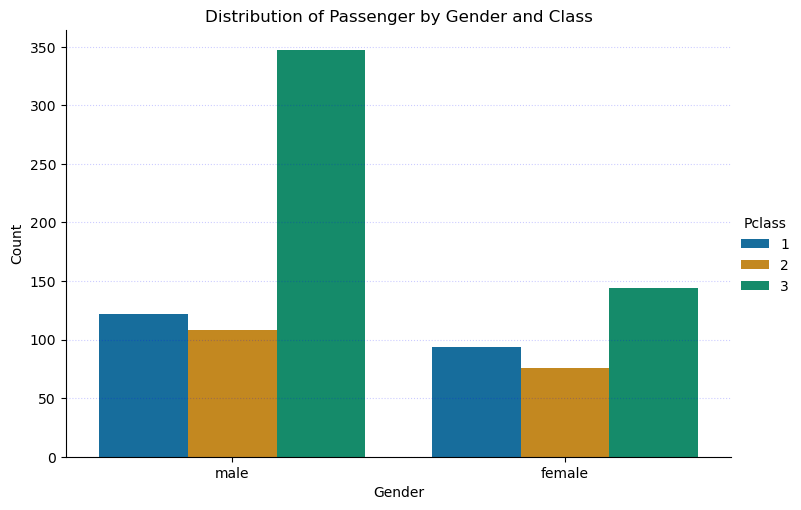

In [44]:
# Ploting countplot
sns.catplot(data, x='Sex', kind='count', hue='Pclass', palette='colorblind', aspect=1.5, height=5)
plt.title('Distribution of Passenger by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', ls=':', color='b', alpha=0.2)
plt.show()

# Observations :
1 From above obseravation we can determine that most male and female travels from 3rd class.

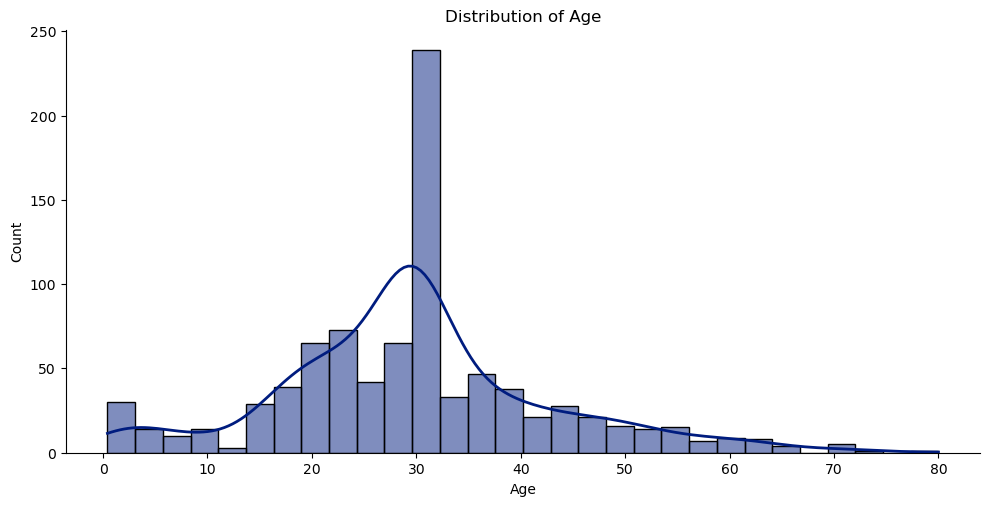

In [45]:
# ploting histogram to check age distribution
sns.displot(data, x='Age', kde=True, color=sns.color_palette('dark')[0], line_kws={'linewidth':2}, aspect=2)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# OBSERVATION:
1.The majority of passengers fall within the age range of 20 to 40 years, based on the analysis the dataset. This observation indicates that a significant portion of the passengers is betwe the ages of 20 and 40.

2. Maximum of passengers are in the age range of 29-32.

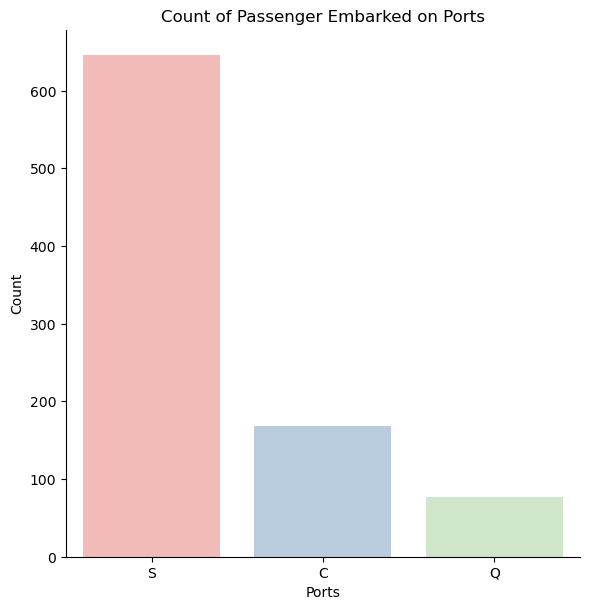

In [46]:
#plotting countplot

sns.catplot(data, x='Embarked',kind='count', palette='Pastel1',height=6) 
plt.title('Count of Passenger Embarked on Ports')
plt.xlabel('Ports')
plt.ylabel('Count')
plt.show()

There are three ports in our dataset from which passengers embarked on ship. They are: S- Southampton Port, C- Cherbourg Port, Q- Queenstown Port

# OBSERVATION:
1. The Southampton port had the highest number of embarked passengers, totaling around 650 individuals. This suggests that a substantial portion of the passengers boarded the ship from Southampton, making it the primary embarkation point.

2. Conversely, the Queenstown port had the lowest number of embarked passengers, with ap proximately 90 individuals. This indicates that Queenstown had the smallest contribution to the total number of embarked passengers among the analyzed ports

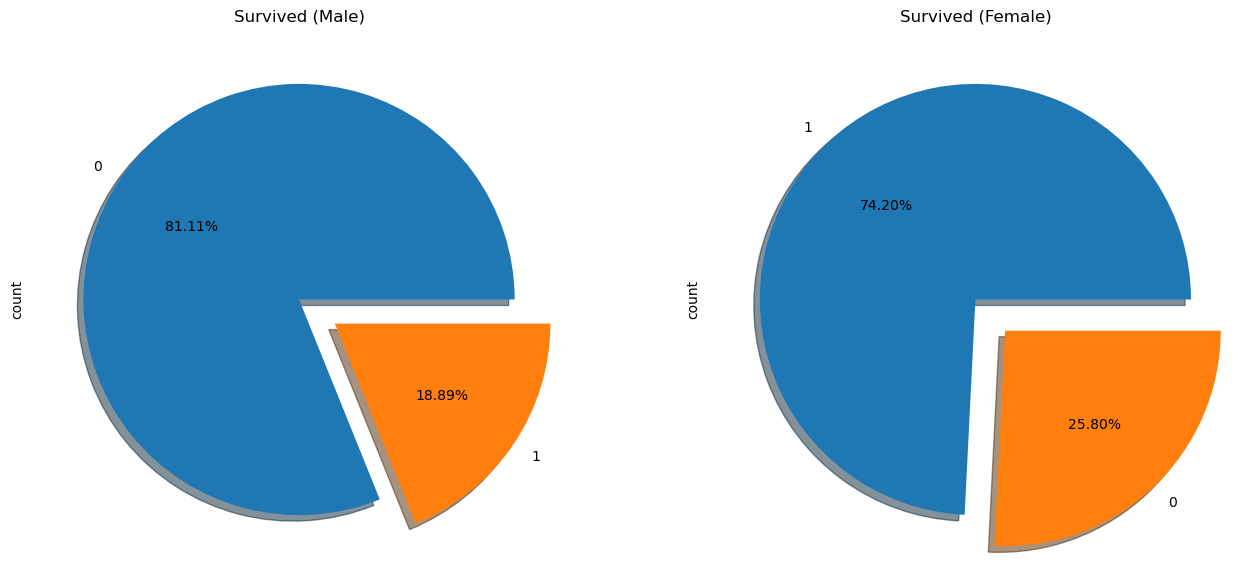

In [47]:
#plotting subplots

fig, ax=plt.subplots(1,2, figsize=(16,7))

data['Survived'][data['Sex']=='male'].value_counts().plot. pie (explode=[0,0.2],

autopct='%.2f%%', ax=ax [0], shadow=True)

data['Survived'] [data['Sex']=='female'].value_counts().plot. pie(explode=[0,0.2],

autopct='%.2f%%', ax=ax [1], shadow=True) 
ax[0].set_title('Survived (Male)') 
ax[1].set_title('Survived (Female)')

plt.show()

# OBSERVATION:
1 The visual analysis above reveals a prioritization of females during rescue operations. It suggests that, in the aftermath of the disaster, efforts were concentrated on ensuring the safety and well-being of female passengers

2 In contrast to females, the survival rate among males appears significantly lower, with only approximately 19% of male passengers surviving the disaster.

3 The visualization indicates that a significant proportion of male passengers did not survive the disaster.

4 The rescue operations demonstrate a clear class-based prioritization, with the highest priority given to first-class passengers, followed by second-class passengers, and lastly, third-class passengers. This class-wise prioritization reflects a strategic approach to rescue efforts, where individuals from higher-class accommodations are attended to with greater urgency.

5 From above pie chart we can see that only 18.89% men and 25.80% females survived in disaster

# END